About the homework: In some tasks, in addition to writing code, answers to questions and conclusions are required (there are special Markdown cells marked with **Answer**).

The ability to analyze the results of experiments is an important skill. Therefore, answers carry more weight than the code: the code accounts for 30% of the task grade, while answers to questions account for 70%.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Download the [UCI Heart Disease Data](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data/data)

In [ ]:
df = pd.read_csv('heart_disease_uci.csv')
df.sample(4)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
119,120,65,Male,Cleveland,asymptomatic,135.0,254.0,False,lv hypertrophy,127.0,False,2.8,flat,1.0,reversable defect,2
244,245,60,Female,Cleveland,non-anginal,120.0,178.0,True,normal,96.0,False,0.0,upsloping,0.0,normal,0
519,520,54,Male,Hungary,asymptomatic,125.0,216.0,False,normal,140.0,False,0.0,NaN,NaN,NaN,1
473,474,56,Male,Hungary,asymptomatic,120.0,85.0,False,normal,140.0,False,0.0,NaN,NaN,NaN,0


# Task 1 (2 points)

Compute the mean, quartiles(Q1, Q2, Q3) and std for every numerical feature (also include column `'id'`).

In [ ]:
#YOUR CODE

# Selecting the numerical columns including 'id' for statistical analysis
numerical_columns = df.select_dtypes(include=['number']).columns

# Computing mean, quartiles (Q1, Q2, Q3), and standard deviation for each numerical feature
stats_summary = df[numerical_columns].describe(percentiles=[0.25, 0.5, 0.75]).T
stats_summary = stats_summary[['mean', 'std', '25%', '50%', '75%']]
stats_summary.columns = ['mean', 'std', 'Q1', 'Q2', 'Q3']

# Displaying the computed summary statistics
print(stats_summary)

                mean         std      Q1     Q2      Q3
id        460.500000  265.725422  230.75  460.5  690.25
age        53.510870    9.424685   47.00   54.0   60.00
trestbps  132.132404   19.066070  120.00  130.0  140.00
chol      199.130337  110.780810  175.00  223.0  268.00
thalch    137.545665   25.926276  120.00  140.0  157.00
oldpeak     0.878788    1.091226    0.00    0.5    1.50
ca          0.676375    0.935653    0.00    0.0    1.00
num         0.995652    1.142693    0.00    1.0    2.00


Let's look into `'id'` feature. Does it seem to differ from other variables? If yes, how?

**Answer** \#YOUR ANSWER Yes, The id does not provide any medical data. it rather provide discriptive features such as age, name, etc.


Draw the distribution of the `'id'` variable. Describe it and explain, why does it look like this. What useful information about heart disease can be extracted from it?

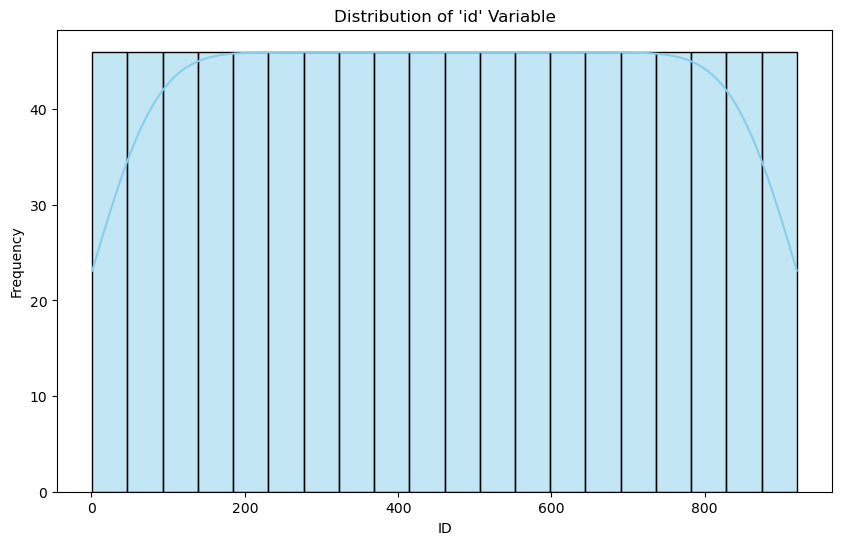

In [ ]:
#YOUR CODE
# Plotting the distribution of the 'id' variable
plt.figure(figsize=(10, 6))
sns.histplot(df['id'], kde=True, bins=20, color='skyblue')
plt.title("Distribution of 'id' Variable")
plt.xlabel("ID")
plt.ylabel("Frequency")
plt.show()

**Answer** \#YOUR ANSWER there is linear distribution of the data.



# Task 2 (2 points)

Let's search for outliers in numerical variables (do not include `'id'`).

First of all, draw boxplots for every one of them on one figure.

Hint: use `plt.subplots`

Describe the plots:



*   Which features do not have any outliers?
*   Which features seem to have the maximum number of outliers?
*   For which features it may be hard to count the number of outliers? Why?





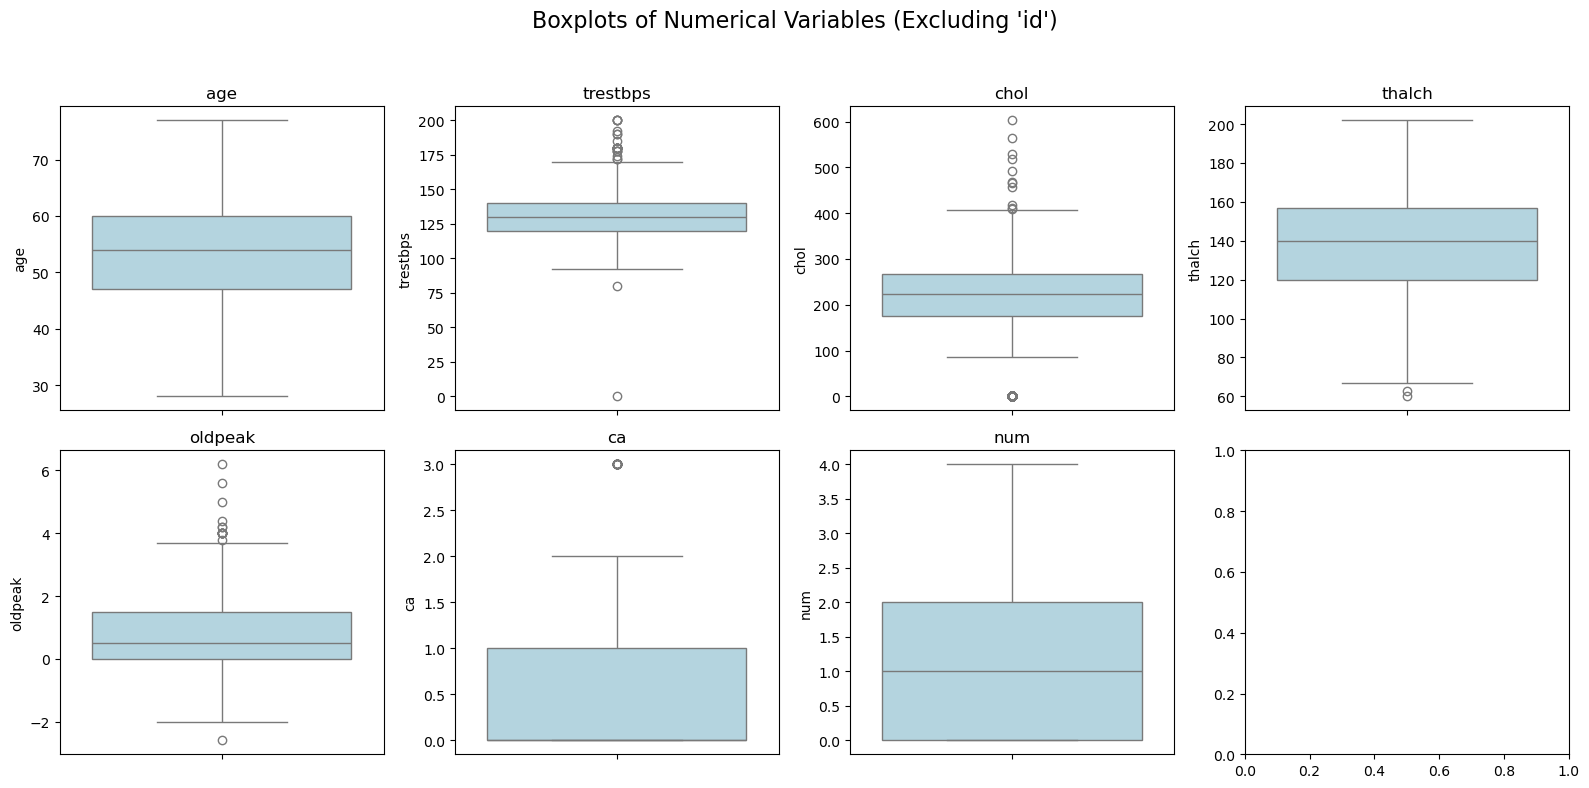

In [ ]:

# Selecting numerical columns excluding 'id' for outlier analysis
numerical_columns = df.select_dtypes(include=['number']).columns.drop('id')

# Creating subplots for each numerical feature
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
fig.suptitle("Boxplots of Numerical Variables (Excluding 'id')", fontsize=16)

# Flattening axes for easy iteration
axes = axes.flatten()

# Plotting each numerical column as a boxplot
for i, col in enumerate(numerical_columns):
    sns.boxplot(data=df, y=col, ax=axes[i], color='lightblue')
    axes[i].set_title(col)
    axes[i].set_xlabel("")

# Adjusting layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


**Answer** \#YOUR ANSWER

a boxplot. 1) Age do not have any outliers.
 2) Chol has the maximum number of outliers
 3) trestbps. this is because the outliers are compacted or lying over each other.

Use the $1.5IQR$ approach and count the number of outliers for each column.

In [ ]:
#YOUR CODE

# Selecting numerical columns excluding 'id'
numerical_columns = df.select_dtypes(include=['number']).columns.drop('id')

# Function to calculate the number of outliers
def count_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers.shape[0]

# Counting outliers for each numerical column
outlier_counts = {col: count_outliers(df, col) for col in numerical_columns}

# Displaying the results
outlier_counts


{'age': 0,
 'trestbps': 28,
 'chol': 183,
 'thalch': 2,
 'oldpeak': 16,
 'ca': 20,
 'num': 0}

For the feature with most outliers, draw the histogram and depict the bounds. Do the bounds seem too tight or too wide? Is deleting all outliers for this feature a good idea?

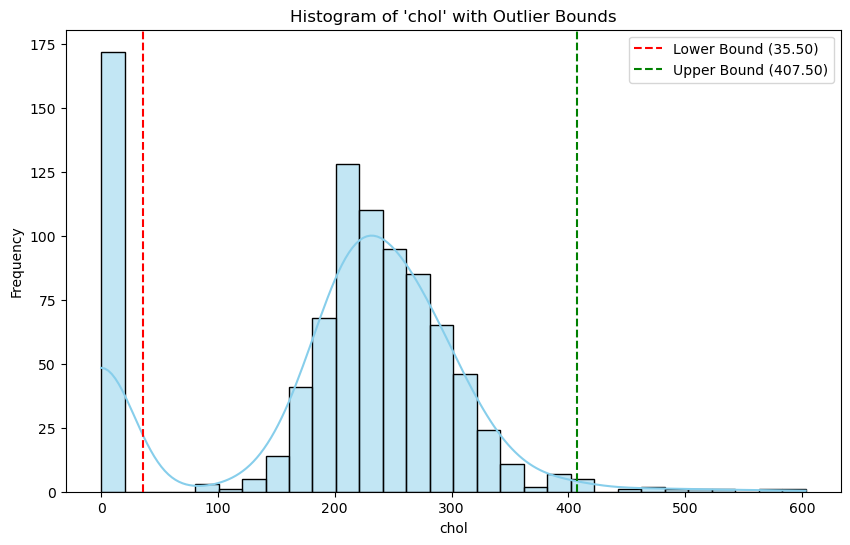

In [ ]:
#YOUR CODE


# Identify the feature with the most outliers
most_outliers_feature = max(outlier_counts, key=outlier_counts.get)

# Calculating the bounds for the feature with the most outliers
Q1 = df[most_outliers_feature].quantile(0.25)
Q3 = df[most_outliers_feature].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Plotting the histogram for the feature with most outliers
plt.figure(figsize=(10, 6))
sns.histplot(df[most_outliers_feature], kde=True, color='skyblue', bins=30)
plt.axvline(lower_bound, color='red', linestyle='--', label=f'Lower Bound ({lower_bound:.2f})')
plt.axvline(upper_bound, color='green', linestyle='--', label=f'Upper Bound ({upper_bound:.2f})')
plt.title(f"Histogram of '{most_outliers_feature}' with Outlier Bounds")
plt.xlabel(most_outliers_feature)
plt.ylabel("Frequency")
plt.legend()
plt.show()


**Answer** \#YOUR ANSWER Then bounds are appear to be too wide. deleting all outliers may lead to the removal of important medical data. it may also affect the mode, mean and median.

hts.

# Task 3 (2 points)

Find the group (or groups) of people that will be deleted, if we delete all the outliers for the feature with the most outliers from the previous task.

In [ ]:
#YOUR CODE

# Defining the lower and upper bounds for the "chol" feature
chol_Q1 = df['chol'].quantile(0.25)
chol_Q3 = df['chol'].quantile(0.75)
chol_IQR = chol_Q3 - chol_Q1
chol_lower_bound = chol_Q1 - 1.5 * chol_IQR
chol_upper_bound = chol_Q3 + 1.5 * chol_IQR

# Identify the rows that would be deleted as outliers
chol_outliers = df[(df['chol'] < chol_lower_bound) | (df['chol'] > chol_upper_bound)]

# Displaying the rows with "chol" outliers
chol_outliers


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
48,49,65,Female,Cleveland,non-anginal,140.0,417.0,True,lv hypertrophy,157.0,False,0.8,upsloping,1.0,normal,0
152,153,67,Female,Cleveland,non-anginal,115.0,564.0,False,lv hypertrophy,160.0,False,1.6,flat,0.0,reversable defect,0
181,182,56,Female,Cleveland,asymptomatic,134.0,409.0,False,lv hypertrophy,150.0,True,1.9,flat,2.0,reversable defect,2
373,374,44,Male,Hungary,asymptomatic,150.0,412.0,False,normal,170.0,False,0.0,NaN,NaN,NaN,0
434,435,53,Female,Hungary,atypical angina,113.0,468.0,NaN,normal,127.0,False,0.0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,819,43,Male,VA Long Beach,asymptomatic,122.0,0.0,False,normal,120.0,False,0.5,upsloping,NaN,NaN,1
819,820,63,Male,VA Long Beach,non-anginal,130.0,0.0,True,st-t abnormality,160.0,False,3.0,flat,NaN,NaN,0
822,823,48,Male,VA Long Beach,non-anginal,102.0,0.0,NaN,st-t abnormality,110.0,True,1.0,downsloping,NaN,NaN,1
839,840,56,Male,VA Long Beach,asymptomatic,NaN,0.0,False,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,1


**Answer** \#YOUR ANSWERative approaches!

# Task 4 (2 points)

Check the proportion of missing values in the dataset. What approach can be used to tackle the problem for every variable?

In [ ]:
#YOUR CODE

# Calculating the proportion of missing values for each column
missing_values = df.isnull().mean() * 100

# Displaying the missing values in descending order
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print("Proportion of Missing Values:\n", missing_values)


Proportion of Missing Values:
 ca          66.413043
thal        52.826087
slope       33.586957
fbs          9.782609
oldpeak      6.739130
trestbps     6.413043
thalch       5.978261
exang        5.978261
chol         3.260870
restecg      0.217391
dtype: float64


Fill the missing values, for categorical features create new category `'NOT GIVEN'`

In [ ]:
# Dictionary to store the fill values for each column
fill_dict = {}

# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Filling categorical columns with the new category 'NOT GIVEN'
for col in categorical_cols:
    df[col] = df[col].fillna('NOT GIVEN')
    fill_dict[col] = 'NOT GIVEN'  # Add the fill value to fill_dict

# For numerical columns, filling with the median and add to fill_dict
for col in numerical_cols:
    if df[col].isnull().sum() > 0:  # Check if there are missing values
        median_value = df[col].median()
        df[col] = df[col].fillna(median_value)
        fill_dict[col] = median_value  # Add the fill value to fill_dict

# Displaying the fill_dict
print("Fill values for each column:")
print(fill_dict)



Fill values for each column:
{'sex': 'NOT GIVEN', 'dataset': 'NOT GIVEN', 'cp': 'NOT GIVEN', 'restecg': 'NOT GIVEN', 'slope': 'NOT GIVEN', 'ca': 'NOT GIVEN', 'thal': 'NOT GIVEN'}


# Task 5 (2 points)

Convert every numerical variable into z-scores:

In [ ]:
from scipy.stats import zscore

#YOUR CODE

# Applying z-score transformation to all numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Convertig each numerical column to its z-score
df[numerical_cols] = df[numerical_cols].apply(zscore)

# Displaying the first few rows to confirm
print(df.head())


         id       age     sex    dataset               cp  trestbps      chol  \
0 -1.730169  1.007386    Male  Cleveland   typical angina  0.705176  0.303643   
1 -1.726404  1.432034    Male  Cleveland     asymptomatic  1.518569  0.789967   
2 -1.722639  1.432034    Male  Cleveland     asymptomatic -0.650479  0.266939   
3 -1.718873 -1.752828    Male  Cleveland      non-anginal -0.108217  0.459634   
4 -1.715108 -1.328180  Female  Cleveland  atypical angina -0.108217  0.037541   

     fbs         restecg    thalch  exang   oldpeak        slope   ca  \
0   True  lv hypertrophy  0.489727  False  1.368109  downsloping  0.0   
1  False  lv hypertrophy -1.181478   True  0.611589         flat  3.0   
2  False  lv hypertrophy -0.345875   True  1.651804         flat  2.0   
3  False          normal  1.961979  False  2.502889  downsloping  0.0   
4  False  lv hypertrophy  1.365120  False  0.517024    upsloping  0.0   

                thal       num  
0       fixed defect -0.871794  
1       

Find the most extreme value in the dataset: in what column is it in?

In [ ]:
#YOUR CODE

# Finding the maximum absolute z-score for each numerical column
max_abs_z_scores = df[numerical_cols].apply(lambda x: x.abs().max())

# Finding the column with the maximum z-score
most_extreme_column = max_abs_z_scores.idxmax()
most_extreme_value = max_abs_z_scores.max()

print(f"The most extreme value is {most_extreme_value}, found in the column '{most_extreme_column}'.")


The most extreme value is 7.157622913292372, found in the column 'trestbps'.


**Answer** \#YOUR ANSWER  The most extreme value is 7.157622913292372, it is found in trestbps.
s.

Draw the distributions on one plot. Adjust the visible area of the histogram in such way, that the bar for the most extreme value is visible. It is ok to cut  very high bars.

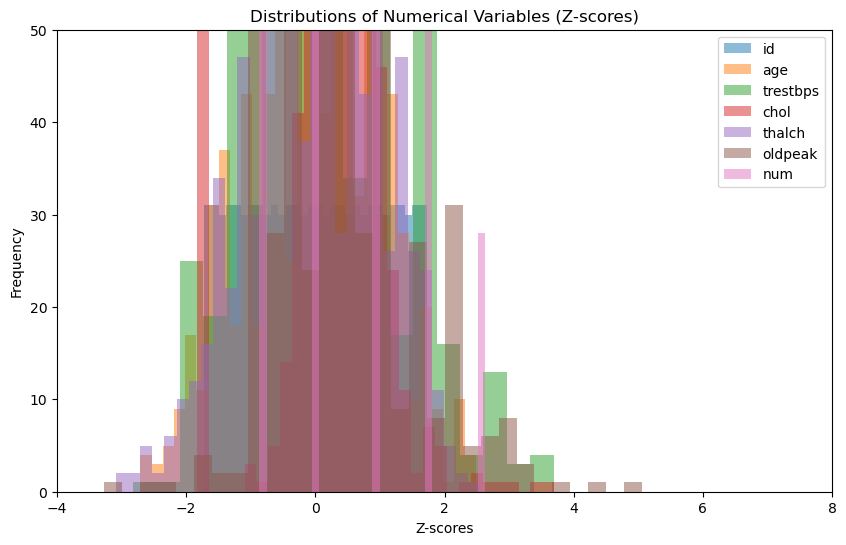

In [ ]:
#YOUR CODE

import matplotlib.pyplot as plt

# Ploting all numerical columns on the same histogram
plt.figure(figsize=(10, 6))

# Ploting each numerical column as a histogram on the same axes
for col in numerical_cols:
    plt.hist(df[col], bins=30, alpha=0.5, label=col)

# Adjusting x-axis to ensure the extreme 'trestbps' value is visible
plt.xlim(-4, 8)  # Ensures the extreme value at ~7.16 is visible
plt.ylim(0, 50)  # Limits y-axis to prevent very high bars from overcrowding

# Addinging title, labels, and legend
plt.title('Distributions of Numerical Variables (Z-scores)')
plt.xlabel('Z-scores')
plt.ylabel('Frequency')
plt.legend()

plt.show()


